In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_neuron_correlation_matrices, load_neurons, plot_rate_heatmap

# Load dataset

In [8]:

pkl_path = "1150b032merge-clean.pkl"
with open(pkl_path, "rb") as f:
    data = pickle.load(f)

print("Type:", type(data))
print("\nTop-level structure:")
for key in data:
    val = data[key]
    if hasattr(val, "shape"):
        print(f"  {key}: {type(val).__name__} shape={val.shape}")
    elif hasattr(val, "__len__") and not isinstance(val, str):
        print(f"  {key}: {type(val).__name__} len={len(val)}")
    else:
        print(f"  {key}: {type(val).__name__} = {repr(val)[:80]}")

if data.get("neurons"):
    print("\nneurons[0] keys:", list(data["neurons"][0].keys()))
    print("  (each neuron: name, varVersion, wireNumber, unitNumber, xPos, yPos, timestamps)")
if data.get("events"):
    print("\nevents[0] keys:", list(data["events"][0].keys()))
    print("  (each event: name, varVersion, timestamps)")
# print out a list of all nuurons names
neurons_names = [n["name"] for n in data["neurons"]]
print(neurons_names)


Type: <class 'dict'>

Top-level structure:
  version: int = 101
  comment: str = ''
  freq: float = 40000.0
  tbeg: float = 0.0
  tend: float = 4877.816975
  neurons: list len=43
  events: list len=44
  intervals: list len=1
  waves: list len=0
  contvars: list len=0
  popvectors: list len=0
  markers: list len=0

neurons[0] keys: ['name', 'varVersion', 'wireNumber', 'unitNumber', 'xPos', 'yPos', 'timestamps']
  (each neuron: name, varVersion, wireNumber, unitNumber, xPos, yPos, timestamps)

events[0] keys: ['name', 'varVersion', 'timestamps']
  (each event: name, varVersion, timestamps)
['n005_L_CA3_wire_2_cell_1', 'n006_L_CA3_wire_2_cell_2', 'n013_L_CA3_wire_4_cell_1', 'n014_L_CA3_wire_4_cell_2', 'n017_L_CA3_wire_5_cell_1', 'n018_L_CA3_wire_5_cell_2', 'n021_L_CA3_wire_6_cell_1', 'n022_L_CA3_wire_6_cell_2', 'n025_L_CA3_wire_7_cell_1', 'n026_L_CA3_wire_7_cell_2', 'n029_L_CA3_wire_8_cell_1', 'n030_L_CA3_wire_8_cell_2', 'n033_L_CA3_wire_1_cell_1', 'n037_L_CA1_wire_2_cell_1', 'n038_L_CA1_

# plot all neurons and events

Saved to results/rate_heatmap_with_events_all_neurons.png


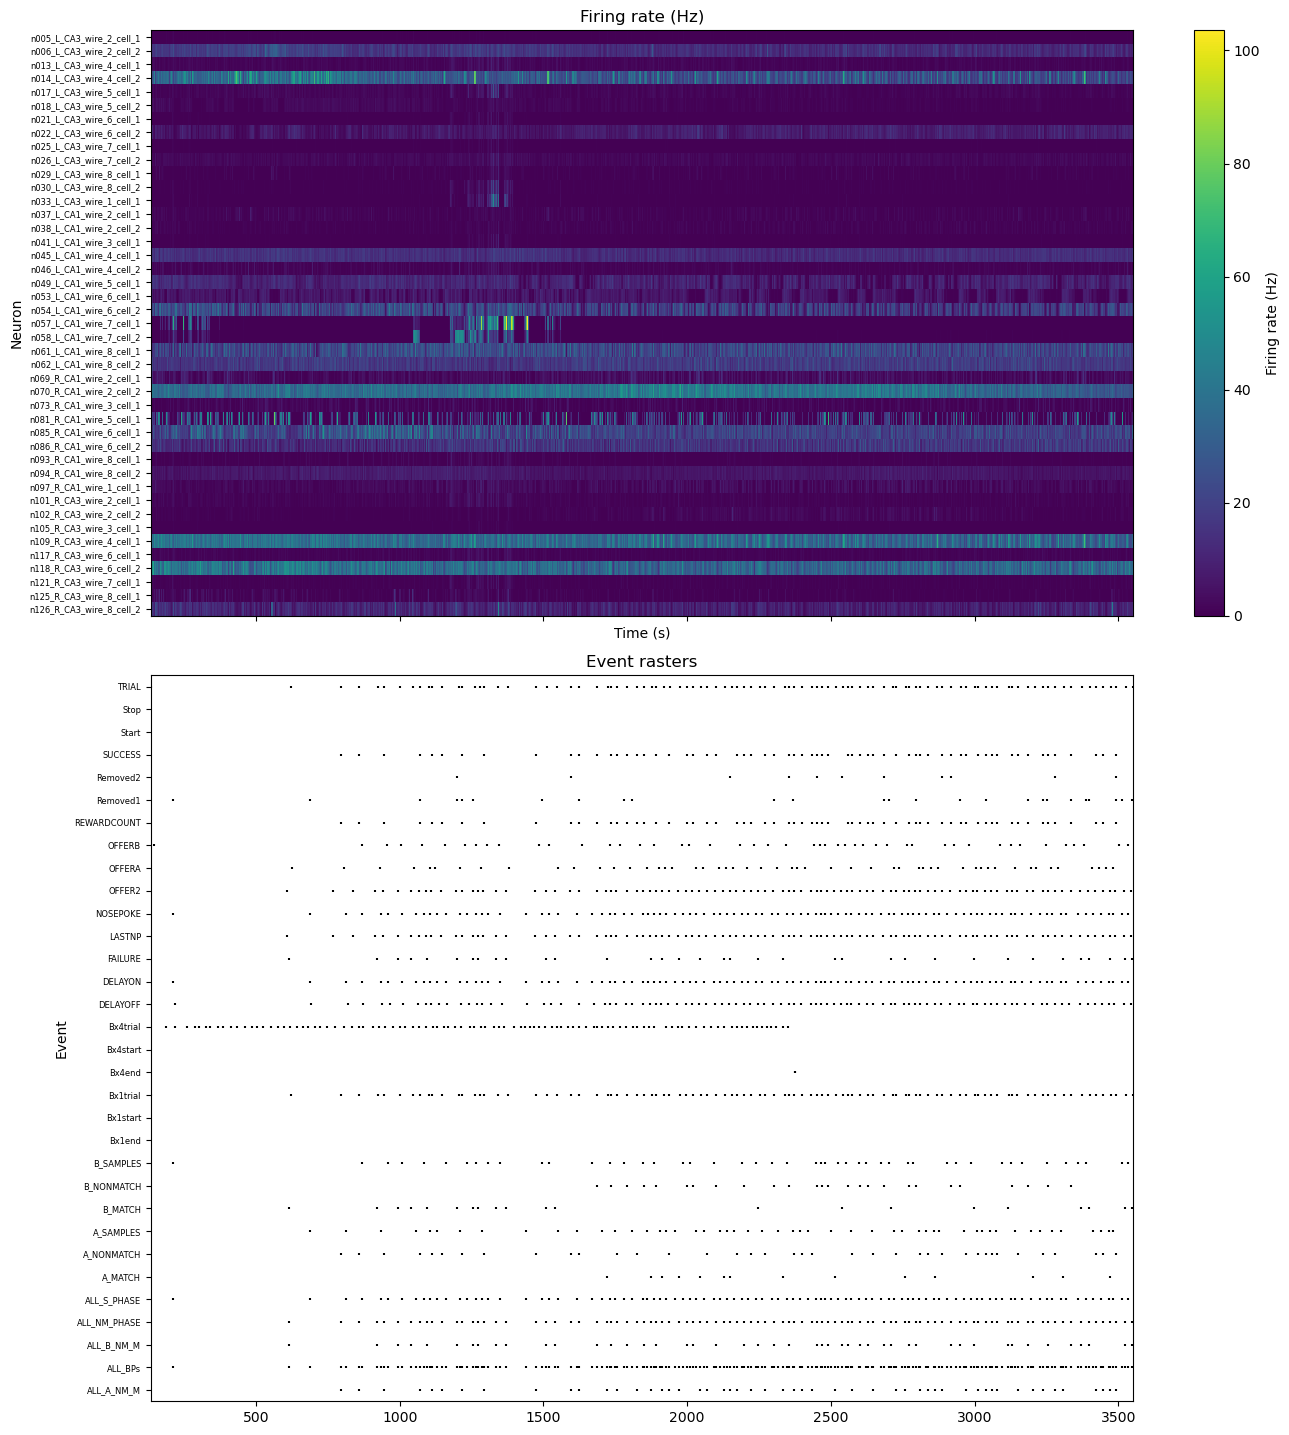

In [9]:
_=plot_rate_heatmap(pkl_path, "results/rate_heatmap_with_events_all_neurons.png", n_bins=1000)

Saved to results/rate_heatmap_with_events_selected_neurons.png


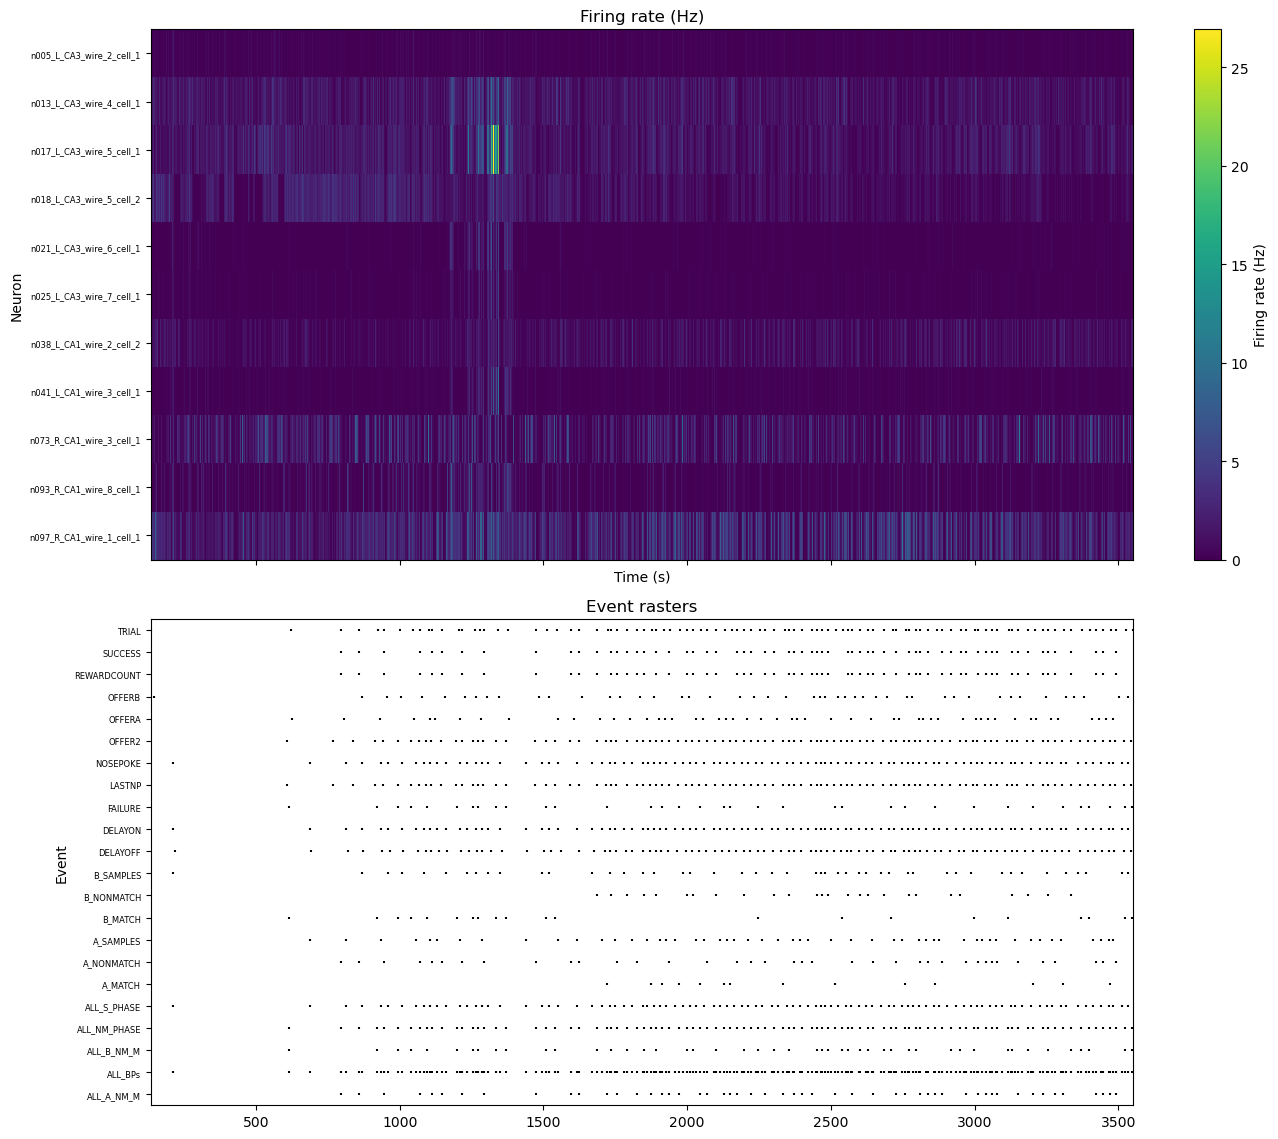

In [ ]:
# # interneurons n097 073
# ca3 neurons  n013 n025 n021
# ca1 neurons  n093 n038 n041 

# causal CA3 to cA1 pairs
# n013-n093 
# n025-n093 
# n021-n093
# n017-n018 have both causal and non causal
# 005 for a very sparse neuron
selected_neurons = ['n017_L_CA3_wire_5_cell_1', 'n018_L_CA3_wire_5_cell_2', 'n005_L_CA3_wire_2_cell_1','n097_R_CA1_wire_1_cell_1', 'n073_R_CA1_wire_3_cell_1', 'n013_L_CA3_wire_4_cell_1', 'n025_L_CA3_wire_7_cell_1', 'n021_L_CA3_wire_6_cell_1', 'n093_R_CA1_wire_8_cell_1', 'n038_L_CA1_wire_2_cell_2', 'n041_L_CA1_wire_3_cell_1']
selected_events =  ['ALL_A_NM_M', 'ALL_BPs', 'ALL_B_NM_M', 'ALL_NM_PHASE', 'ALL_S_PHASE', 'A_MATCH', 'A_NONMATCH', 'A_PRESSES', 'A_SAMPLES', 'A_STIM', 'B_MATCH', 'B_NONMATCH', 'B_PRESSES', 'B_SAMPLES', 'B_STIM',  'DELAYOFF', 'DELAYON', 'FAILURE',  'LASTNP', 'NOSEPOKE', 'OFFER2', 'OFFERA', 'OFFERB', 'OPAMATCH', 'OPANONMATCH', 'OPASAMPLE', 'OPBMATCH', 'OPBNONMATCH', 'OPBSAMPLE', 'OPNOSEPOKE', 'REWARDCOUNT',  'SUCCESS',  'TRIAL']

neurons = plot_rate_heatmap(pkl_path, "results/rate_heatmap_with_events_selected_neurons.png", n_bins=1000,event_list = selected_events,neuron_list = selected_neurons)

/Users/bytedance/Documents/PHD/spiking_neuron_model_tut/ac_cc_analysis/utils.py:591: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved Fine resolution matrix at results/correlation_matrix_edge_mean_True_fine.png


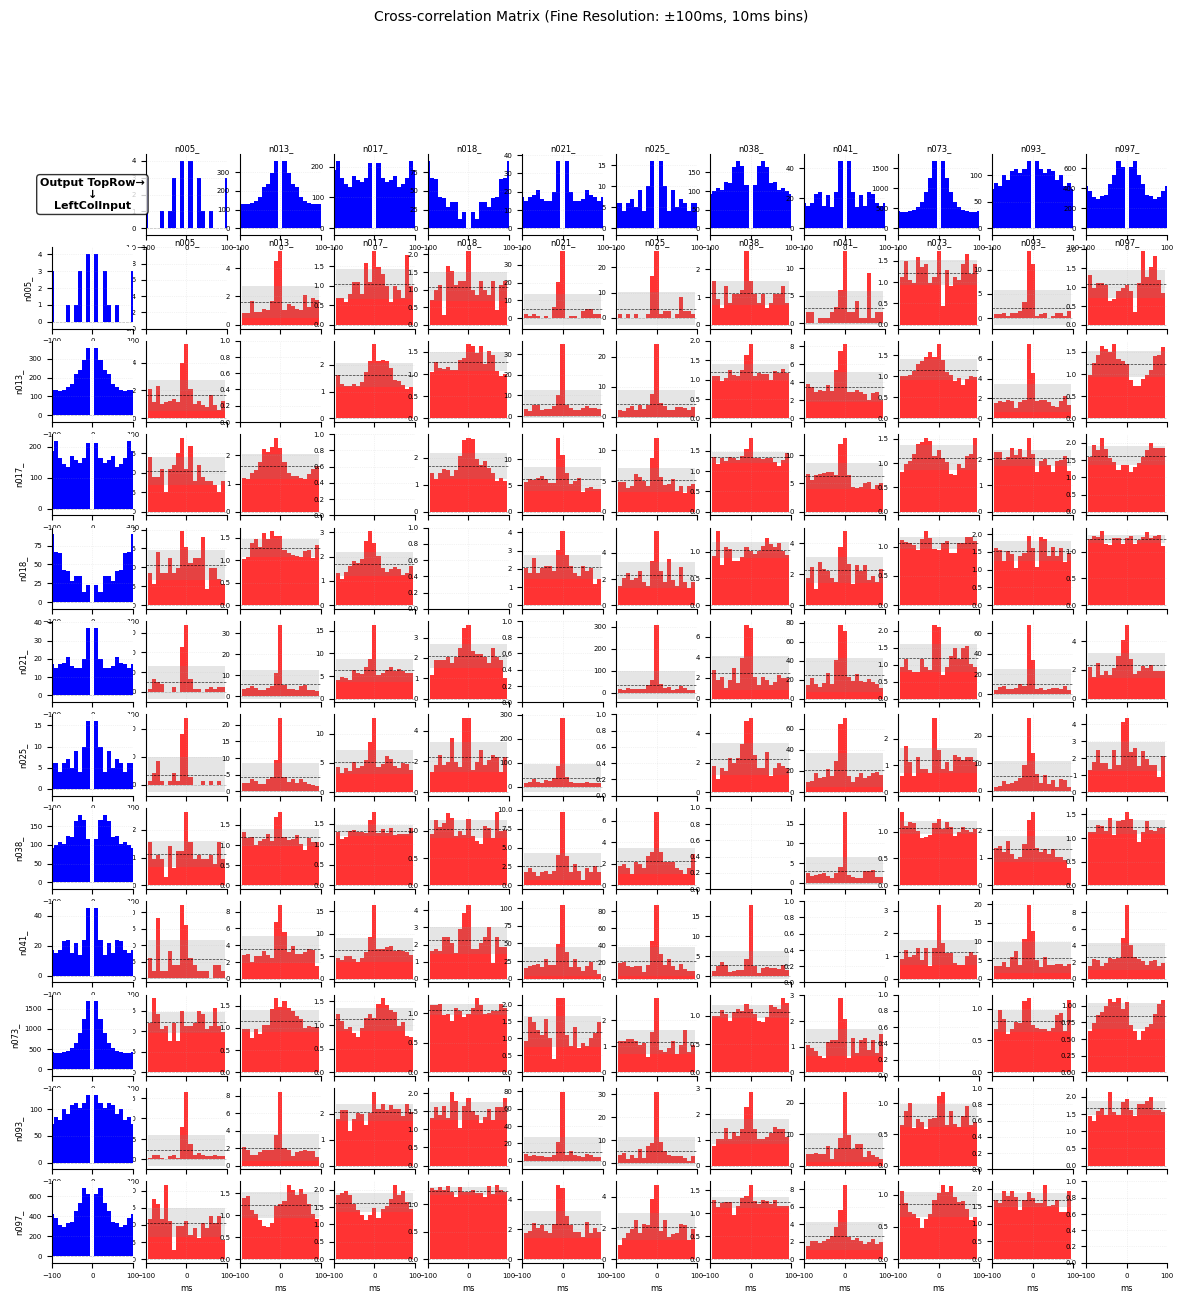

[(10, 100, 'Fine')]

In [11]:
# plot a cross correlation matrix between all neurons

selected_spike_data,_ = load_neurons(pkl_path,neuron_list=selected_neurons)
# configs = [(80, 1000, "Broad"),(10, 100, "Fine")]# (bin size, lag, name)
configs = [(10, 100, "Fine")]
save_dir = 'results/'
plot_neuron_correlation_matrices(selected_spike_data, save_dir,  configs=configs)
